### Import required libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
#Read the dataset
Game=pd.read_csv(r"D:/Data science/DataSets/game.csv")

In [4]:
Game

,userId,game,rating
0,3,The Legend of Zelda: Ocarina of Time,4.0
1,6,Tony Hawk's Pro Skater 2,5.0
2,8,Grand Theft Auto IV,4.0
3,10,SoulCalibur,4.0
4,11,Grand Theft Auto IV,4.5
...,...,...,...
4995,4529,Donut County,2.5
4996,4533,MotorStorm: Apocalypse,3.0
4997,4544,The Last Guy,3.0
4998,4548,Valiant Hearts: The Great War,4.0


In [5]:
Game.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   userId  5000 non-null   int64  
 1   game    5000 non-null   object 
 2   rating  5000 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 117.3+ KB


In [6]:
#Checking duplicates
duplicate = Game.duplicated()
duplicate

0       False
1       False
2       False
3       False
4       False
        ...  
4995    False
4996    False
4997    False
4998    False
4999    False
Length: 5000, dtype: bool

In [7]:
sum(duplicate)

0

###### No Duplicates in the data

In [8]:
print(list(Game.columns.values))

['userId', 'game', 'rating']


<AxesSubplot:>

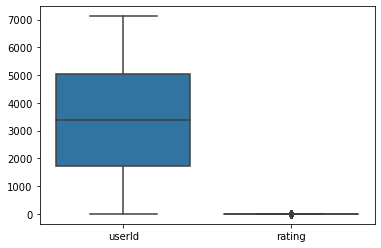

In [9]:
#Checking for Outlier
sns.boxplot(data=Game)

###### There are no outliers in the data

In [10]:
#Check for count of NA's in each column
Game.isna().sum()

userId    0
game      0
rating    0
dtype: int64

##### There are no na values in the data

# Exploratory Data Analysis
Measures of Central Tendency / First moment business decision

In [11]:
Game.mean()

userId    3432.2822
rating       3.5925
dtype: float64

In [12]:
Game.median()

userId    3395.0
rating       4.0
dtype: float64

In [13]:
Game.mode()

,userId,game,rating
0,156,Madden NFL 07,4.0
1,903,NaN,NaN
2,982,NaN,NaN
3,1931,NaN,NaN
4,2191,NaN,NaN
5,3338,NaN,NaN
6,3513,NaN,NaN
7,4133,NaN,NaN


##### Measures of Dispersion / Second moment business decision

In [14]:
Game.var()

userId    3.968067e+06
rating    9.898917e-01
dtype: float64

In [15]:
Game.std()

userId    1992.000866
rating       0.994933
dtype: float64

##### Third moment business decision

In [16]:
Game.skew()

userId    0.075282
rating   -0.510682
dtype: float64

##### Fourth moment business decision

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer 

###### term frequency inverse document frequncy is a numerical statistic that is intended to reflect how important a word is to document in a collecion or corpus

In [18]:
# Creating a Tfidf Vectorizer to remove all stop words
tfidf = TfidfVectorizer(stop_words = "english")    # taking stop words from tfid vectorizer 

In [19]:
# Replacing the NaN values in overview column with empty string
Game["game"].isnull().sum()

0

In [20]:
# Preparing the Tfidf matrix by fitting and transforming
tfidf_matrix = tfidf.fit_transform(Game.game)   #Transform a count matrix to a normalized tf or tf-idf representation

In [21]:
tfidf_matrix.shape #5000 3068

(5000, 3068)

In [22]:
# From the above matrix we need to find the similarity score.
# There are several metrics for this such as the euclidean, 
# the Pearson and the cosine similarity scores

In [23]:
# A numeric quantity to represent the similarity between 2 movies 
# Cosine similarity - metric is independent of magnitude and easy to calculate 
# cosine(x,y)= (x.y⊺)/(||x||.||y||)

In [24]:
# calculating the dot product using sklearn's linear_kernel()
from sklearn.metrics.pairwise import linear_kernel

In [25]:
# Computing the cosine similarity on Tfidf matrix
cosine_sim_matrix = linear_kernel(tfidf_matrix, tfidf_matrix)

In [26]:
# creating a mapping of anime name to index number 
game_index = pd.Series(Game.index, index = Game['game']).drop_duplicates()

In [27]:
Game_id = game_index['Grand Theft Auto IV']
Game_id

game
Grand Theft Auto IV      2
Grand Theft Auto IV      4
Grand Theft Auto IV    474
dtype: int64

In [28]:
def get_recommendations(game, topN):    
    # topN = 10
    # Getting the movie index using its title 
    Game_id = game_index[game]
    
    # Getting the pair wise similarity score for all the anime's with that 
    # anime
    cosine_scores = list(enumerate(cosine_sim_matrix[Game_id]))
    
    # Sorting the cosine_similarity scores based on scores 
    cosine_scores = sorted(cosine_scores, key=lambda x:x[1], reverse = True)
    
    # Get the scores of top N most similar movies 
    cosine_scores_N = cosine_scores[0: topN+1]
    
    # Getting the movie index 
    game_idx  =  [i[0] for i in cosine_scores_N]
    game_scores =  [i[1] for i in cosine_scores_N]
    
    # Similar movies and scores
    game_similar_show = pd.DataFrame(columns=["game", "Score"])
    game_similar_show["game"] = Game.loc[game_idx, "game"]
    game_similar_show["Score"] = game_scores
    game_similar_show.reset_index(inplace = True)  
    print (game_similar_show)
    # The End

In [29]:
# Enter your anime and number of anime's to be recommended
game_index["SoulCalibur"]

game
SoulCalibur       3
SoulCalibur    3925
dtype: int64

In [30]:
game_index['Grand Theft Auto IV']

game
Grand Theft Auto IV      2
Grand Theft Auto IV      4
Grand Theft Auto IV    474
dtype: int64

In [32]:
get_recommendations("The Last Guy", topN = 10)

    index                                  game  Score
0    4997                          The Last Guy    1.0
1       0  The Legend of Zelda: Ocarina of Time    0.0
2       1              Tony Hawk's Pro Skater 2    0.0
3       2                   Grand Theft Auto IV    0.0
4       3                           SoulCalibur    0.0
5       4                   Grand Theft Auto IV    0.0
6       5                    Super Mario Galaxy    0.0
7       6                  Super Mario Galaxy 2    0.0
8       7                    Grand Theft Auto V    0.0
9       8                    Grand Theft Auto V    0.0
10      9                    Grand Theft Auto V    0.0
